In [33]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [34]:
#### CARGAR LOS DATOS ####
data = pd.read_csv('/content/drive/MyDrive/Wholesale customers data.csv')

In [35]:
### ANALIZAR LOS DATOS ###
#Conocer la forma de los datos
data.shape

(440, 8)

In [36]:
#Conocer los datos nulos
data.isnull().sum()


Channel             0
Region              0
Fresh               0
Milk                0
Grocery             0
Frozen              0
Detergents_Paper    0
Delicassen          0
dtype: int64

In [37]:
#Conocer el formato de los datos
data.dtypes

Channel             int64
Region              int64
Fresh               int64
Milk                int64
Grocery             int64
Frozen              int64
Detergents_Paper    int64
Delicassen          int64
dtype: object

In [39]:
#Se selecionan unos datos al azar para posteriormente verificar el clúster 
#al que pertenecen
#indices = [26, 176, 392]
indices = [26, 176, 392, 404]
muestras = pd.DataFrame(data.iloc[indices], columns = data.keys()).reset_index(drop = True)

In [40]:
### PROCESAMIENTO DE LOS DATOS ###
#Eliminamos las columnas de región y canal 
data = data.drop(['Region', 'Channel'], axis = 1)
muestras = muestras.drop(['Region', 'Channel'], axis = 1)


In [41]:
#Se realiza el escalamiento de los datos
from sklearn import preprocessing

data_escalada = preprocessing.Normalizer().fit_transform(data)
muestras_escalada = preprocessing.Normalizer().fit_transform(muestras)


In [42]:
### ANÁLISIS DE MACHINE LEARNING ###

#Se determina las variables a evaluar
X = data_escalada


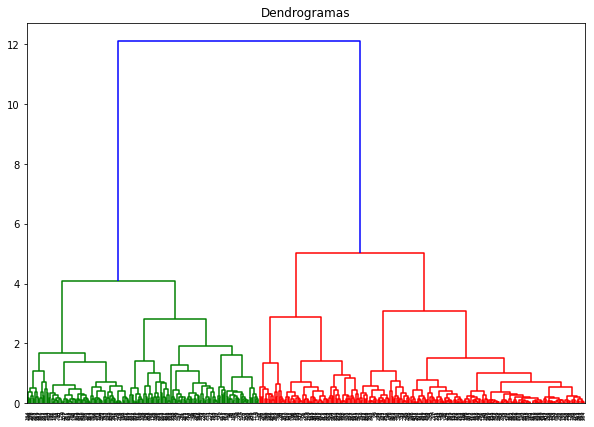

In [11]:
#Se gráfica el dendrograma para obtener el número de clúster
import scipy.cluster.hierarchy as shc

plt.figure(figsize=(10, 7))  
plt.title("Dendrogramas") 
dendrograma = shc.dendrogram(shc.linkage(X, method = 'ward'))

In [13]:
#Obtenido el número de clúster se procede a definir los clústeres 
from sklearn.cluster import AgglomerativeClustering

#Se define el algoritmo junto con el valor de K
algoritmo = AgglomerativeClustering(n_clusters = 3, 
                                    affinity='euclidean', linkage='ward')  
#Se entrena el algoritmo
algoritmo.fit(X)
pred1 = algoritmo.fit_predict(X)

In [14]:
#Utilicemos los datos de muestras y verifiquemos en que cluster se encuentran
muestra_prediccion = algoritmo.fit_predict(muestras_escalada)

for i, pred in enumerate(muestra_prediccion):
    print( "Muestra", i, "se encuentra en el clúster:", pred)

Muestra 0 se encuentra en el clúster: 2
Muestra 1 se encuentra en el clúster: 1
Muestra 2 se encuentra en el clúster: 0


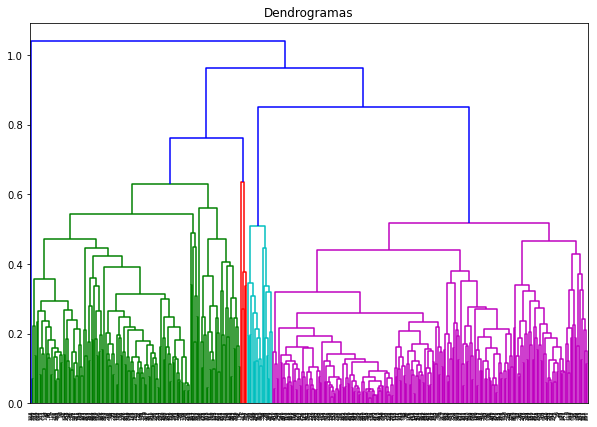

In [47]:
#Se gráfica el dendrograma para obtener el número de clúster
import scipy.cluster.hierarchy as shc

plt.figure(figsize=(10, 7))  
plt.title("Dendrogramas") 
dendrograma = shc.dendrogram(shc.linkage(X, method = 'average'))

In [44]:
#Obtenido el número de clúster se procede a definir los clústeres 
from sklearn.cluster import AgglomerativeClustering

#Se define el algoritmo junto con el valor de K
algoritmo1 = AgglomerativeClustering(n_clusters = 4, 
                                    affinity='euclidean', linkage='ward')  
#Se entrena el algoritmo
algoritmo1.fit(X)
pred1 = algoritmo.fit_predict(X)

In [45]:
#Utilicemos los datos de muestras y verifiquemos en que cluster se encuentran
muestra_prediccion = algoritmo.fit_predict(muestras_escalada)

for i, pred in enumerate(muestra_prediccion):
    print( "Muestra", i, "se encuentra en el clúster:", pred)

Muestra 0 se encuentra en el clúster: 2
Muestra 1 se encuentra en el clúster: 3
Muestra 2 se encuentra en el clúster: 1
Muestra 3 se encuentra en el clúster: 0
